<a href="https://colab.research.google.com/github/DarshanSuresh/Data-Mining/blob/main/LAB_12_01_May_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 11 - 16 April 2024

## KNN for Iris dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_excel('iris.xlsx')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: >

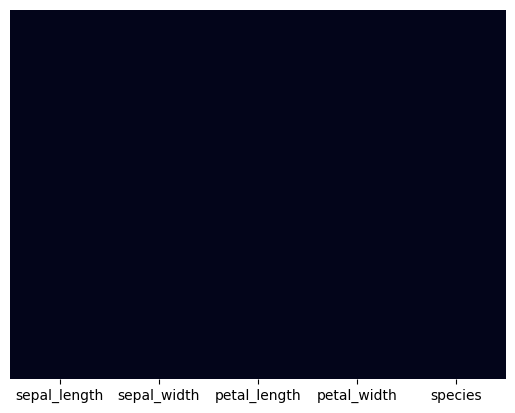

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
X = df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean').fit(X_train_scaled,y_train)
knn.predict(X_train_scaled)
knn.score(X_train_scaled,y_train)

0.975

In [ ]:
knn.predict(X_test_scaled)
knn.score(X_test_scaled,y_test)

0.9

In [ ]:
pred = knn.predict(X_test_scaled)
matrix = classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.75      0.86        12
   virginica       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

Text(0.5, 14.722222222222216, 'Actual value')

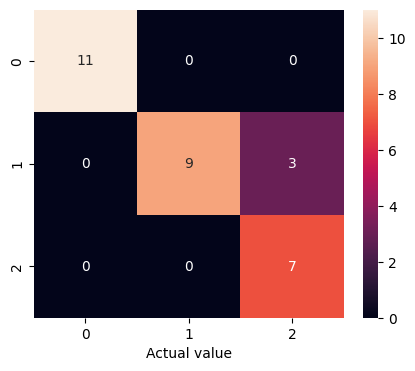

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.xlabel('Actual value')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3,p=3,metric='euclidean').fit(X_train_scaled,y_train)
knn1.predict(X_train_scaled)
knn1.score(X_train_scaled,y_train)

0.9583333333333334

In [ ]:
knn1.predict(X_test_scaled)
knn1.score(X_test_scaled,y_test)

0.9333333333333333

In [ ]:
pred = knn1.predict(X_test_scaled)
matrix = classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91        12
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,pred)

Text(0.5, 14.722222222222216, 'Actual value')

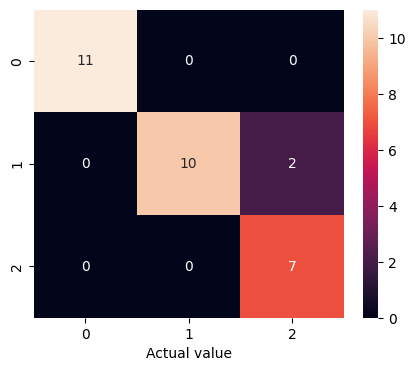

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm1, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.xlabel('Actual value')

Uses same process:
01) KNN
02) Decision Tree
03) SVM
04) K-Means

## KNN for Diabe dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df['Outcome'].unique()

array([1, 0])

<Axes: >

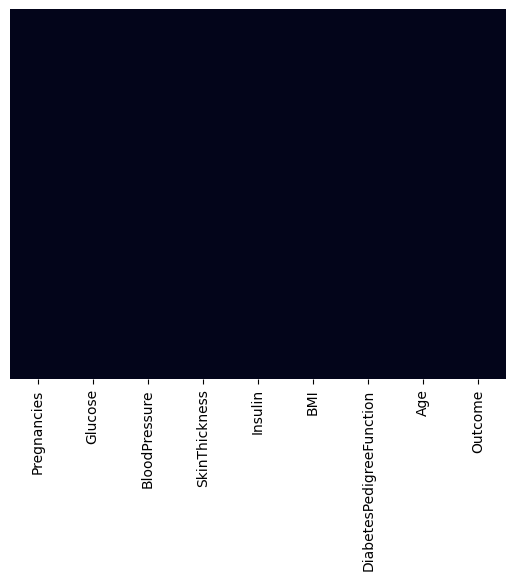

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
X = df.iloc[:,0:8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8,p=2,metric='minkowski').fit(X_train_scaled,y_train)
knn.predict(X_train_scaled)
knn.score(X_train_scaled,y_train)

0.8013029315960912

In [ ]:
knn.predict(X_test_scaled)
knn.score(X_test_scaled,y_test)

0.7207792207792207

In [ ]:
pred = knn.predict(X_test_scaled)
matrix = classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        94
           1       0.76      0.43      0.55        60

    accuracy                           0.73       154
   macro avg       0.74      0.67      0.68       154
weighted avg       0.74      0.73      0.71       154



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

Text(0.5, 14.722222222222216, 'Actual value')

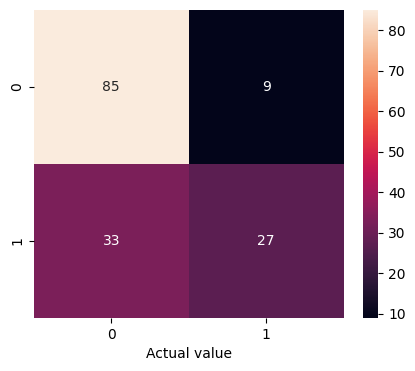

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.xlabel('Actual value')

## Decision tree for Heart

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df['AHD'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: >

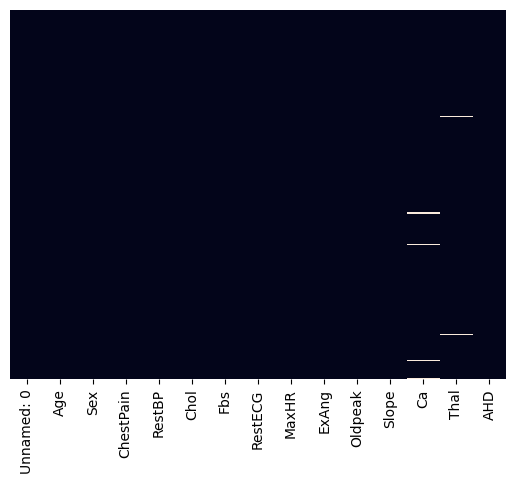

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
df = df.drop(columns='Unnamed: 0')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df['ChestPain'] = df["ChestPain"].astype('category')
df['ChestPain'] = df["ChestPain"].cat.codes
df['Thal'] = df["Thal"].astype('category')
df['Thal'] = df["Thal"].cat.codes
df['AHD'] = df["AHD"].astype('category')
df['AHD'] = df["AHD"].cat.codes
df = df.dropna()

In [ ]:
X = df.drop(columns = "AHD")
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


# LAB 12 - 01 May 2024

## SVM Classifier on Iris

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_excel('iris.xlsx')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


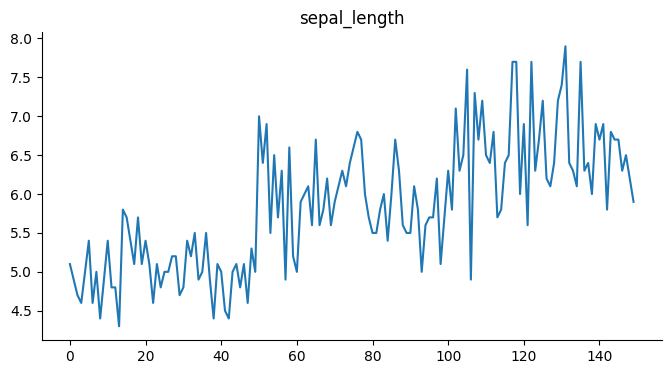

In [ ]:
from matplotlib import pyplot as plt
df['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

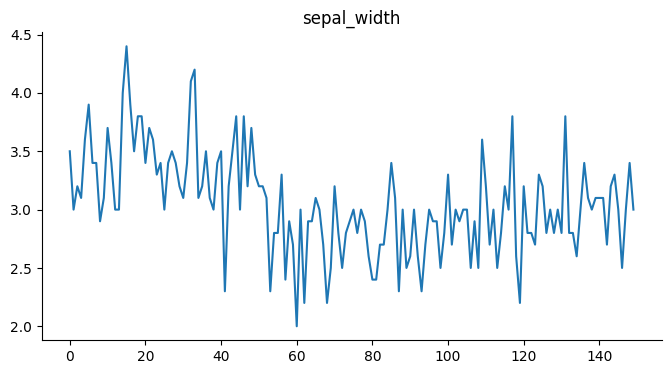

In [ ]:
from matplotlib import pyplot as plt
df['sepal_width'].plot(kind='line', figsize=(8, 4), title='sepal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

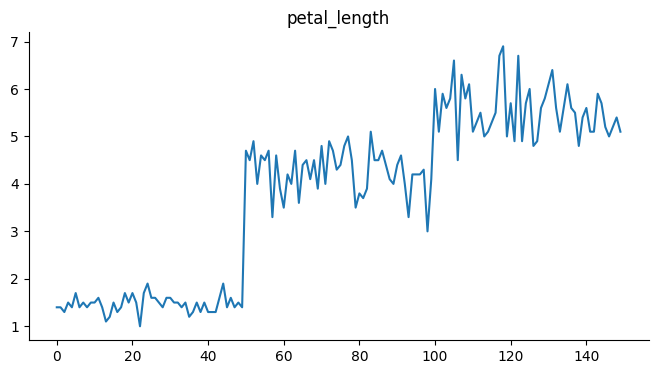

In [ ]:
from matplotlib import pyplot as plt
df['petal_length'].plot(kind='line', figsize=(8, 4), title='petal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

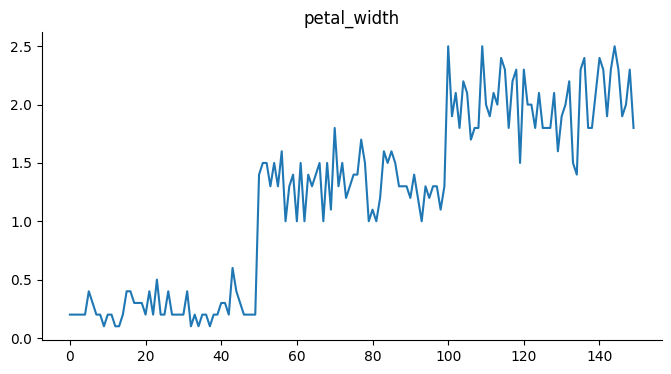

In [ ]:
from matplotlib import pyplot as plt
df['petal_width'].plot(kind='line', figsize=(8, 4), title='petal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: >

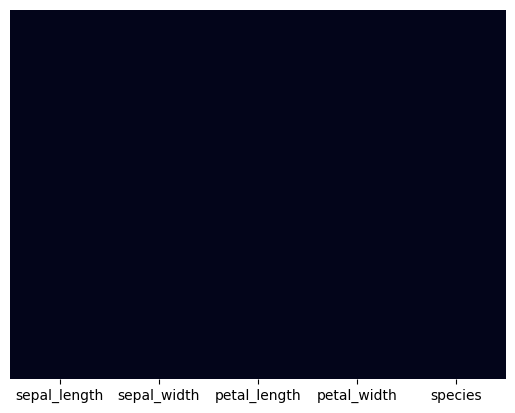

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [ ]:
X = df.drop(columns='species')
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
36,5.5,3.5,1.3,0.2
37,4.9,3.1,1.5,0.1
13,4.3,3.0,1.1,0.1
68,6.2,2.2,4.5,1.5
11,4.8,3.4,1.6,0.2
...,...,...,...,...
120,6.9,3.2,5.7,2.3
112,6.8,3.0,5.5,2.1
48,5.3,3.7,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
44,5.1,3.8,1.9,0.4
7,5.0,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
95,5.7,3.0,4.2,1.2
75,6.6,3.0,4.4,1.4
20,5.4,3.4,1.7,0.2
121,5.6,2.8,4.9,2.0
26,5.0,3.4,1.6,0.4
19,5.1,3.8,1.5,0.3


In [ ]:
y_train

36         setosa
37         setosa
13         setosa
68     versicolor
11         setosa
          ...    
120     virginica
112     virginica
48         setosa
4          setosa
56     versicolor
Name: species, Length: 105, dtype: object

In [ ]:
y_test

92     versicolor
44         setosa
7          setosa
21         setosa
95     versicolor
75     versicolor
20         setosa
121     virginica
26         setosa
19         setosa
81     versicolor
88     versicolor
143     virginica
117     virginica
23         setosa
77     versicolor
138     virginica
73     versicolor
14         setosa
142     virginica
123     virginica
62     versicolor
83     versicolor
74     versicolor
42         setosa
60     versicolor
40         setosa
45         setosa
87     versicolor
124     virginica
41         setosa
131     virginica
70     versicolor
46         setosa
126     virginica
54     versicolor
85     versicolor
114     virginica
38         setosa
101     virginica
149     virginica
136     virginica
113     virginica
97     versicolor
141     virginica
Name: species, dtype: object

## Model

In [ ]:
from sklearn.svm import SVC
model = SVC(C=7,kernel='poly')
model.fit(X_train,y_train)

SVC(C=7, kernel='poly')

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

0.9333333333333333

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model.fit(X_train, y_train)

pred = model.predict(X_test)
matrix = classification_report(y_test, pred)
print(matrix)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.88      0.88        16
   virginica       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

Text(0.5, 14.722222222222216, 'Actual value')

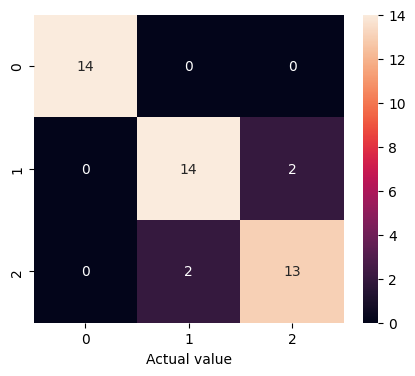

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.xlabel('Actual value')

## Decision Tree on Heart

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df['AHD'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: >

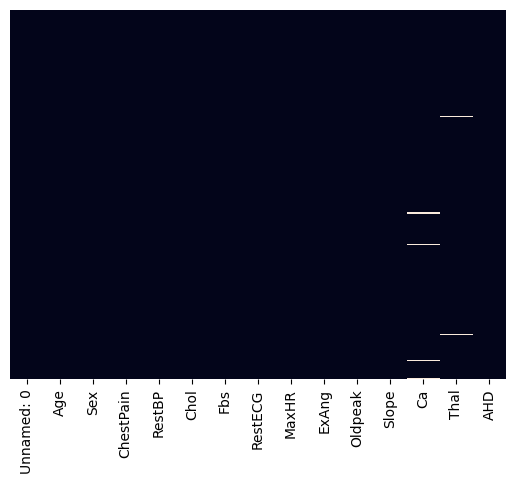

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [ ]:
df = df.drop(columns='Unnamed: 0')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes

In [ ]:
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes

In [ ]:
df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop(columns='Ca')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 301
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        299 non-null    int64  
 1   Sex        299 non-null    int64  
 2   ChestPain  299 non-null    int8   
 3   RestBP     299 non-null    int64  
 4   Chol       299 non-null    int64  
 5   Fbs        299 non-null    int64  
 6   RestECG    299 non-null    int64  
 7   MaxHR      299 non-null    int64  
 8   ExAng      299 non-null    int64  
 9   Oldpeak    299 non-null    float64
 10  Slope      299 non-null    int64  
 11  Thal       299 non-null    int8   
 12  AHD        299 non-null    int8   
dtypes: float64(1), int64(9), int8(3)
memory usage: 26.6 KB


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,1,0


In [ ]:
X = df.drop(columns='AHD')
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0
1,67,1,0,160,286,0,2,108,1,1.5,2,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2
3,37,1,1,130,250,0,0,187,0,3.5,3,1
4,41,0,2,130,204,0,2,172,0,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,2
298,45,1,3,110,264,0,0,132,0,1.2,2,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2
300,57,1,0,130,131,0,0,115,1,1.2,2,2


In [ ]:
y = df['AHD']
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 299, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=21)

In [ ]:
X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Thal
83,68,1,1,180,274,1,2,150,1,1.6,2,2
155,70,1,0,130,322,0,2,109,0,2.4,2,1
180,48,1,0,124,274,0,2,166,0,0.5,2,2
75,65,0,1,160,360,0,2,151,0,0.8,1,1
281,47,1,1,130,253,0,0,179,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
189,69,1,1,140,254,0,2,146,0,2.0,2,2
120,48,1,0,130,256,1,2,150,1,0.0,1,2
48,65,0,1,140,417,1,2,157,0,0.8,1,1
262,60,0,3,150,240,0,0,171,0,0.9,1,1


In [ ]:
X_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Thal
61,46,0,1,142,177,0,2,160,1,1.4,3,1
300,57,1,0,130,131,0,0,115,1,1.2,2,2
55,54,1,0,124,266,0,2,109,1,2.2,2,2
245,67,1,0,120,237,0,0,71,0,1.0,2,1
95,52,1,0,128,255,0,0,161,1,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
286,58,0,0,170,225,1,2,146,1,2.8,2,0
149,60,0,1,102,318,0,0,160,0,0.0,1,1
87,53,0,1,128,216,0,2,115,0,0.0,1,-1
109,39,1,0,118,219,0,0,140,0,1.2,2,2


In [ ]:
y_train

83     1
155    1
180    1
75     0
281    0
      ..
189    1
120    1
48     0
262    0
209    1
Name: AHD, Length: 179, dtype: int8

In [ ]:
y_test

61     0
300    1
55     1
245    1
95     1
      ..
286    1
149    0
87     0
109    1
82     0
Name: AHD, Length: 120, dtype: int8

## Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()

parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

cv = GridSearchCV(treemodel, param_grid=parameter, scoring='accuracy')

cv.fit(X_train, y_train)
print(cv.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'splitter': 'random'}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
y_pred = cv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred,y_test)
score

0.7333333333333333

In [ ]:
matrix = classification_report(y_test,y_pred)

Text(33.22222222222222, 0.5, 'Actual Value')

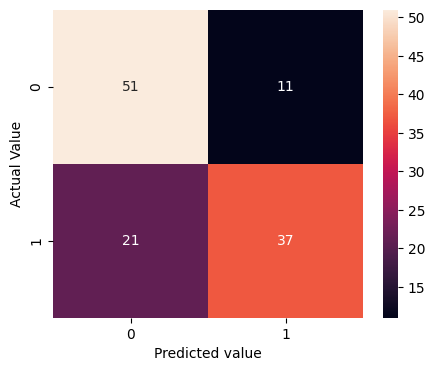

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')